# Address points from IndianaMAP

**Challenges**

1. Data file is too big.


**Getting the data**

Go to maps.indiana.edu go to infrastructure->address points->download to get ESRI geodatabase. Convert to GeoJSON using `org2org` command line utility.

In [1]:
import pathlib
import numpy as np
import pandas as pd

import geopandas as gpd
import folium

In [10]:
keep_cols = ['FULL_ADDRESS', 'ADDRESS_CITY', 'STATE_NAME', 'ADDRESS_ZIP', 'ADDRESS_COUNTY', 'LATITUDE', 'LONGITUDE']

In [2]:
source_path = pathlib.Path().cwd().parent.joinpath('data', 'processed', 'County_Address_Points_IGIO_IN.json')
source_path.exists()

True

In [14]:
save_as_parquet = source_path.parent.joinpath(source_path.stem + '.parquet')

In [3]:
save_path = pathlib.Path().cwd().parent.joinpath('data', 'processed', 'subset_address_points.json')

In [ ]:
# only get addresses and lat, long. Save as parquet
#gpd.read_file(source_path)[keep_cols].to_parquet(str(save_as_parquet))

In [4]:
# take a small number of rows for prototyping
#df = gpd.read_file(source_path, rows=slice(0, 1000))
#df.to_file(str(save_path), driver='GeoJSON')

df = gpd.read_file(save_path)

In [6]:
df.shape

(1000, 34)

In [7]:
df.head()

,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,PERMANENT_IDENTIFIER,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,...,GEO_FULL_ADDRESS,UNITTYPE,UNITID,PROP_CCODE,ASSESS_YR,PLACE_TYPE,SRCE_ID,LATITUDE,LONGITUDE,geometry
0,11966,N,,550,,W,010103100018000012,7,Address_Points,Address Points,...,11966 N 550 W,None,None,511,2018.0,None,1,40.917384,-85.045573,POINT (664579.932 4531424.858)
1,1850,W,,1200,,N,010205100053000013,413,Address_Points,Address Points,...,1850 W 1200 N,None,None,501,2018.0,None,2,40.919159,-84.974194,POINT (670586.486 4531758.746)
2,690,E,,900,,N,010222200017000013,947,Address_Points,Address Points,...,690 E 900 N,None,None,101,2018.0,None,3,40.875880,-84.925597,POINT (674792.855 4527049.943)
3,7455,N,,PIQUA,RD,,010227200001000013,1153,Address_Points,Address Points,...,7455 N PIQUA RD,None,None,499,2018.0,None,4,40.853987,-84.925242,POINT (674880.392 4524620.180)
4,2590,W,,750,,N,010230300003000013,1276,Address_Points,Address Points,...,2590 W 750 N,None,None,101,2018.0,None,5,40.853530,-84.987711,POINT (669615.781 4524446.476)


In [24]:
# what is current status?

df.columns

Index(['ADDR_HN', 'ADDR_PD', 'ADDR_PT', 'ADDR_SN', 'ADDR_ST', 'ADDR_SD',
       'PERMANENT_IDENTIFIER', 'SOURCE_FEATUREID', 'SOURCE_DATASETID',
       'SOURCE_DATADESC', 'SOURCE_ORIGINATOR', 'LOADDATE', 'FULL_ADDRESS',
       'ADDRESS_NUMBER', 'ADDRESS_SUFFIX', 'ADDRESS_TYPE', 'ADDRESS_PREFIX',
       'ADDRESS_NAME', 'ADDRESS_CITY', 'ADDRESS_COUNTY', 'STATE_NAME',
       'CURRENT_STATUS', 'ADDRESS_ZIP', 'COUNTY_ID', 'GEO_FULL_ADDRESS',
       'UNITTYPE', 'UNITID', 'PROP_CCODE', 'ASSESS_YR', 'PLACE_TYPE',
       'SRCE_ID', 'LATITUDE', 'LONGITUDE', 'geometry'],
      dtype='object')

In [31]:
df[['ADDRESS_NUMBER', 'ADDRESS_SUFFIX', 'ADDRESS_TYPE', 'ADDRESS_PREFIX', 'ADDRESS_NAME', 'ADDRESS_CITY', 'ADDRESS_COUNTY', 'STATE_NAME', 'ADDRESS_ZIP']]

,ADDRESS_NUMBER,ADDRESS_SUFFIX,ADDRESS_TYPE,ADDRESS_PREFIX,ADDRESS_NAME,ADDRESS_CITY,ADDRESS_COUNTY,STATE_NAME,ADDRESS_ZIP
0,11990,W,,N,550,DECATUR,1,IN,46733
1,0,,,,,DECATUR,1,IN,46733
2,750,N,,E,900,DECATUR,1,IN,46733
3,0,,,,,DECATUR,1,IN,46733
4,2585,N,,W,750,DECATUR,1,IN,46733
...,...,...,...,...,...,...,...,...,...
995,209,,ST,N,SEVENTEENTH,DECATUR,1,IN,46733
996,209,,ST,N,SEVENTEENTH,DECATUR,1,IN,46733
997,209,,ST,N,SEVENTEENTH,DECATUR,1,IN,46733
998,209,,ST,N,SEVENTEENTH,DECATUR,1,IN,46733


In [7]:
col_subset_df = df[keep_cols].copy()
col_subset_df.head()

,FULL_ADDRESS,ADDRESS_CITY,STATE_NAME,ADDRESS_ZIP,ADDRESS_COUNTY,LATITUDE,LONGITUDE
0,11966 N 550 W,DECATUR,IN,46733,1,40.917384,-85.045573
1,1850 W 1200 N,DECATUR,IN,46733,1,40.919159,-84.974194
2,690 E 900 N,DECATUR,IN,46733,1,40.875880,-84.925597
3,7455 N PIQUA RD,DECATUR,IN,46733,1,40.853987,-84.925242
4,2590 W 750 N,DECATUR,IN,46733,1,40.853530,-84.987711


In [9]:
col_subset_df.to_parquet(str(save_path.parent.joinpath('subset_address_points.parquet')))

In [32]:
df[['ADDR_HN', 'ADDR_PD', 'ADDR_PT', 'ADDR_SN', 'ADDR_ST', 'ADDR_SD']]

,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD
0,11966,N,,550,,W
1,1850,W,,1200,,N
2,690,E,,900,,N
3,7455,N,,PIQUA,RD,
4,2590,W,,750,,N
...,...,...,...,...,...,...
995,209,N,,SEVENTEENTH,ST,
996,209,N,,SEVENTEENTH,ST,
997,209,N,,SEVENTEENTH,ST,
998,209,N,,SEVENTEENTH,ST,


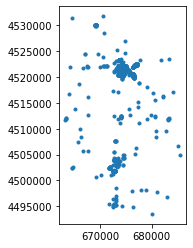

In [10]:
df.plot(marker='.')

In [23]:
addr_map = folium.Map()
for x, y in zip(df.LATITUDE, df.LONGITUDE):
    folium.CircleMarker(location=[x,y], radius=1).add_to(addr_map)
#m.fit_bounds(m.get_bounds())
addr_map